<a href="https://colab.research.google.com/github/leman-cap13/my_projects/blob/main/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lmanqasml","key":"2d851a4eb9cae06770577185722326e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

Dataset URL: https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
License(s): CC0-1.0


In [ ]:
import zipfile

with zipfile.ZipFile('/content/sign-language-for-numbers.zip','r') as zip_ref:
  zip_ref.extractall()

In [ ]:
import tensorflow as tf

In [ ]:
path_data='/content/Sign Language for Numbers'
img_size=(224,224)

train_data=tf.keras.preprocessing.image_dataset_from_directory(path_data,
                                                               image_size=img_size,
                                                               subset='training',
                                                               validation_split=0.2,
                                                               seed=42,
                                                               label_mode='categorical',
                                                               crop_to_aspect_ratio=True)

test_data=tf.keras.preprocessing.image_dataset_from_directory(path_data,
                                                               image_size=img_size,
                                                               subset='validation',
                                                               validation_split=0.2,
                                                               seed=42,
                                                               label_mode='categorical',
                                                               crop_to_aspect_ratio=True)


Found 9000 files belonging to 6 classes.
Using 7200 files for training.
Found 9000 files belonging to 6 classes.
Using 1800 files for validation.


In [ ]:
import shutil
deleted_path=['/content/Sign Language for Numbers/unknown','/content/Sign Language for Numbers/9','/content/Sign Language for Numbers/8',
          '/content/Sign Language for Numbers/7', '/content/Sign Language for Numbers/6'    ]

for path in deleted_path:
    shutil.rmtree(path, ignore_errors=True)

In [ ]:
class_names=train_data.class_names

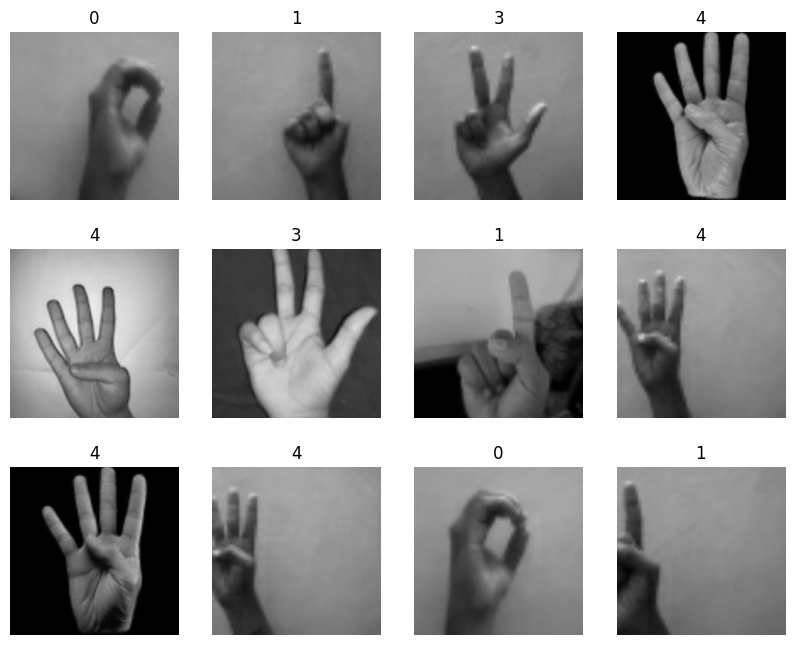

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
for image,label in train_data.take(1):
  for index in range(12):
    plt.subplot(3,4,index+1)
    plt.imshow(image[index].numpy().astype('uint8'))
    plt.title(class_names[label[index].numpy().argmax().astype('int8')])
    plt.axis('off')

In [ ]:
inputs=tf.keras.layers.Input(shape=(224,224,3))

x=tf.keras.applications.resnet50.preprocess_input(inputs)
base_model=tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_tensor=x)

base_model.trainable=False

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(6,activation='softmax')(avg)

model=tf.keras.Model(inputs=inputs, outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
model.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 65s 184ms/step - accuracy: 0.7062 - loss: 0.8618 - val_accuracy: 0.9672 - val_loss: 0.1887
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 58s 108ms/step - accuracy: 0.9693 - loss: 0.1564 - val_accuracy: 0.9817 - val_loss: 0.1111
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.9813 - loss: 0.0950 - val_accuracy: 0.9844 - val_loss: 0.0849
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9877 - loss: 0.0671 - val_accuracy: 0.9883 - val_loss: 0.0655
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9916 - loss: 0.0509 - val_accuracy: 0.9878 - val_loss: 0.0586


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


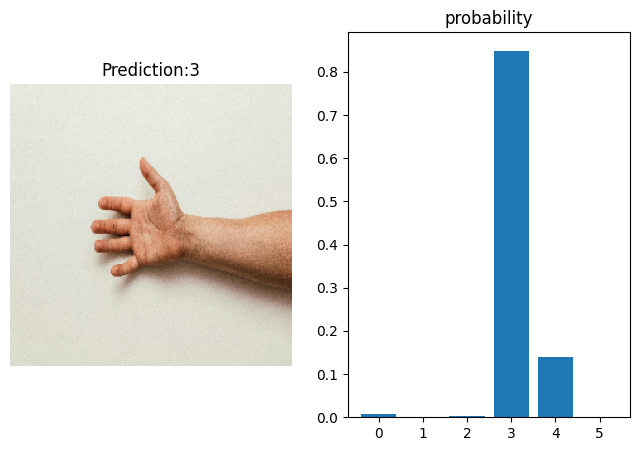

In [ ]:
def pred_and_plot(model,image_path):
  img=mpimg.imread(image_path)
  img=tf.image.resize(img,size=[224,224])
  img=img[tf.newaxis,...]
  pred=model.predict(img)

  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  plt.imshow(img[0]/255)
  plt.title(f"Prediction:{class_names[np.argmax(pred)]}")
  plt.axis(False)
  plt.subplot(1,2,2)
  plt.bar(class_names,pred[0])
  plt.title('probability')
  plt.show()

pred_and_plot(model,'/content/pexels-juanpphotoandvideo-1257770.jpg')

In [ ]:
model.save('sign_lang.keras')